In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
from textblob import TextBlob
import pandas as pd
import sklearn
import pickle
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.model_selection import learning_curve 

In [2]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]
print(len(messages))

5574


#### Print the first ten messages in this SMS corpus

In [3]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 1

#### Using Pandas for convenience

In [4]:
messages = pd.read_csv('SMSSpamCollection', sep='\t', quoting=csv.QUOTE_NONE,
                           header=0, names=['spam_or_ham', 'text'])
print(messages)

     spam_or_ham                                               text
0            ham                      Ok lar... Joking wif u oni...
1           spam  Free entry in 2 a wkly comp to win FA Cup fina...
2            ham  U dun say so early hor... U c already then say...
3            ham  Nah I don't think he goes to usf, he lives aro...
4           spam  FreeMsg Hey there darling it's been 3 week's n...
...          ...                                                ...
5568        spam  This is the 2nd time we have tried 2 contact u...
5569         ham               Will ü b going to esplanade fr home?
5570         ham  Pity, * was in mood for that. So...any other s...
5571         ham  The guy did some bitching but I acted like i'd...
5572         ham                         Rofl. Its true to its name

[5573 rows x 2 columns]


#### Aggregate Statistics of the Corpus

In [5]:
messages.groupby('spam_or_ham').describe()

text                                                            \
            count unique                                                top   
spam_or_ham                                                                   
ham          4826   4517                             Sorry, I'll call later   
spam          747    653  Please call our customer service representativ...   

                  
            freq  
spam_or_ham       
ham           30  
spam           4

In [6]:
#creating a target col, with 0 for ham, 1 for spam
df = messages.drop(columns="spam_or_ham")
df["spam"] = messages["spam_or_ham"].apply(lambda x:1 if 'spam' in str(x)
                                  else 0)
df.columns=['text','target']
df['length'] = df['text'].map(lambda text: len(text))

df.head(10)

,text,target,length
0,Ok lar... Joking wif u oni...,0,29
1,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
2,U dun say so early hor... U c already then say...,0,49
3,"Nah I don't think he goes to usf, he lives aro...",0,61
4,FreeMsg Hey there darling it's been 3 week's n...,1,147
5,Even my brother is not like to speak with me. ...,0,77
6,As per your request 'Melle Melle (Oru Minnamin...,0,160
7,WINNER!! As a valued network customer you have...,1,157
8,Had your mobile 11 months or more? U R entitle...,1,154
9,I'm gonna be home soon and i don't want to tal...,0,109


In [7]:
df.length.describe()

count    5573.000000
mean       80.472815
std        59.852276
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

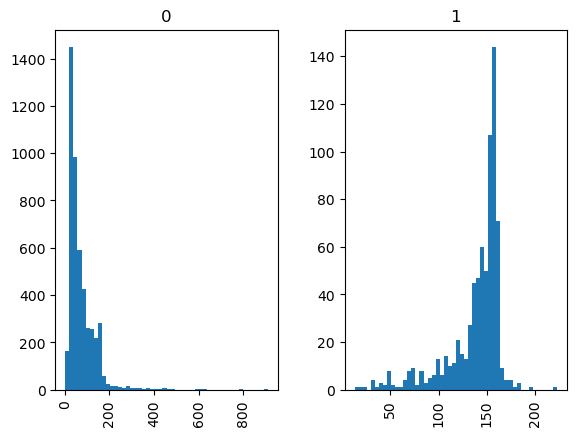

In [8]:
df.hist(column='length', by='target', bins=50)

### Train-Test Split

In [10]:
#train test split
df.drop(columns="length")
X_train, X_test, y_train, y_test = train_test_split(df['text'], 
                                                    df['target'], 
                                                    random_state=0)
data1 = {'X_train': X_train,'y_train': y_train}
data1_ = pd.DataFrame(data1)
data2 = {'X_test': X_test,'y_test': y_test}
data2_ = pd.DataFrame(data2)
data1_.to_csv("training_data.csv")
data2_.to_csv("test_data.csv")